In [64]:
import pandas as pd
import numpy as np
import math
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
properties = pd.read_csv("./FinalDataset.csv")
properties = properties.drop("Unnamed: 0", axis=1)
properties

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,...,closestParking,Property Crime,Violent Crime,metro_lat,metro_long,park_lat,park_long,parking_lat,parking_long,parking_cost
0,https://www.realtor.com/rentals/details/1000-Q...,9388507782,2977613306,ZILL,3tbhj3u37w4g5,FOR_RENT,NaN,APARTMENT,1000 Queen Anne Ave N,1000 Queen Anne Ave,...,W ROY ST BETWEEN QUEEN ANNE AVE N AND 1ST AVE W,1513.000000,68.666667,47.61139,-122.33722,47.629656,-122.355466,47.625777,47.625777,10.00
1,https://www.realtor.com/rentals/details/1800-4...,2045697942,2977600988,RENU,r3813091,FOR_RENT,"For interested prospects, please provide a mob...",TOWNHOMES,1800 43rd Ave E Apt 301,1800 43rd Ave,...,E REPUBLICAN ST BETWEEN 15TH N AVE E AND 16TH ...,859.250000,135.500000,47.64972,-122.30380,47.635779,-122.276602,47.623296,47.623296,7.00
2,https://www.realtor.com/rentals/details/2111-W...,2796743275,2977598979,ZUMU,60419377,FOR_RENT,"For interested prospects, please provide a mob...",CONDOS,2111 Waverly Pl N Apt 201,2111 Waverly Pl,...,WESTLAKE EAST RDWY AVE N BETWEEN CROCKETT ST A...,1513.000000,68.666667,47.61139,-122.33722,47.640523,-122.344468,47.638869,47.638869,1.17
3,https://www.realtor.com/rentals/details/626-4t...,1189690439,2977587231,SEWA,2326148,FOR_RENT,Special Temporary reduced Rent for 12 months! ...,CONDOS,626 4th Ave W Apt 201,626 4th Ave,...,3RD AVE W BETWEEN W MERCER ST AND W ROY ST,2401.000000,114.000000,47.61139,-122.33722,47.626809,-122.364152,47.625174,47.625174,18.72
4,https://www.realtor.com/rentals/details/3227-1...,9156930040,2977591809,RLXB,ce741b5a-2101-11ee-abe0-06771900a607,FOR_RENT,NaN,APARTMENT,3227 14th Ave W,3227 14th Ave,...,BALLARD AVE NW BETWEEN NW DOCK PL AND NW IONE PL,2401.000000,114.000000,47.61139,-122.33722,47.647239,-122.379191,47.664825,47.664825,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,https://www.realtor.com/rentals/details/165-17...,1396043702,2966261121,RLXB,890a70c2-58a1-11ee-80f0-02dcc31ee659,FOR_RENT,NaN,APARTMENT,165 17th Ave,165 17th Ave,...,E JEFFERSON ST BETWEEN 17TH AVE AND 18TH AVE,1435.250000,175.000000,47.59833,-122.32806,47.601407,-122.307257,47.606118,47.606118,0.25
1723,https://www.realtor.com/rentals/details/2418-N...,9761418095,2966245973,RLXB,b88b3ea6-69de-11ee-8ab6-12de4bf481cd,FOR_RENT,NaN,APARTMENT,2418 NW 57th St,2418 NW 57th St,...,24TH AVE NW BETWEEN NW 57TH ST AND NW 58TH ST,1162.333333,70.666667,47.70306,-122.32806,47.670549,-122.385487,47.670550,47.670550,1.00
1724,https://www.realtor.com/rentals/details/603-12...,2785018075,2966268560,RLXB,5b0c80e0-9466-11e8-ba21-1866dab9098f,FOR_RENT,NaN,APARTMENT,603 12th Ave E,603 12th Ave,...,E MERCER ST BETWEEN BROADWAY E AND 10TH AVE E,1070.666667,167.666667,47.61861,-122.32028,47.619809,-122.313094,47.624205,47.624205,4.00
1725,https://www.realtor.com/rentals/details/1510-2...,2814816034,2966252971,RLXB,620a7610-99b7-11ec-9463-061468efe32a,FOR_RENT,Available now is a room for rent with a privat...,APARTMENT,1510 23rd Ave,1510 23rd Ave,...,E CHERRY ST BETWEEN 17TH AVE AND 18TH AVE,1435.250000,175.000000,47.61861,-122.32028,47.617309,-122.300994,47.608086,47.608086,3.58


In [36]:
properties.columns

Index(['property_url', 'property_id', 'listing_id', 'mls', 'mls_id', 'status',
       'text', 'style', 'full_street_line', 'street', 'unit', 'city', 'state',
       'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built',
       'days_on_mls', 'list_price', 'list_price_min', 'list_price_max',
       'list_date', 'sold_price', 'last_sold_date', 'assessed_value',
       'estimated_value', 'tax', 'tax_history', 'new_construction', 'lot_sqft',
       'price_per_sqft', 'latitude', 'longitude', 'neighborhoods', 'county',
       'fips_code', 'stories', 'hoa_fee', 'parking_garage', 'agent_id',
       'agent_name', 'agent_email', 'agent_phones', 'agent_mls_set',
       'agent_nrds_id', 'broker_id', 'broker_name', 'builder_id',
       'builder_name', 'office_id', 'office_mls_set', 'office_name',
       'office_email', 'office_phones', 'nearby_schools', 'primary_photo',
       'alt_photos', 'closestMetro', 'closestPark', 'closestParking',
       'Property Crime', 'Violent Crime', 'me

In [41]:
x_cols = ['style', 'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built', 'days_on_mls', 'lot_sqft', 'stories', 'parking_garage', 'Property Crime', 'Violent Crime']

In [19]:
properties['list_price'].value_counts()

list_price
3200.0    10
2200.0     6
4500.0     6
1850.0     5
1350.0     5
          ..
1940.0     1
900.0      1
3850.0     1
8260.0     1
9057.0     1
Name: count, Length: 166, dtype: int64

In [37]:
properties['price'] = 0

In [38]:
for i in range(len(properties)):
    if(pd.isnull(properties['list_price'].iloc[i])):
        if not pd.isnull(properties['list_price_min'].iloc[i]) and not pd.isnull(properties['list_price_max'].iloc[i]):
            properties['price'].iloc[i] = (properties['list_price_min'].iloc[i] + properties['list_price_max'].iloc[i] ) / 2
    else:
        properties['price'].iloc[i] = properties['list_price'].iloc[i]

C:\Users\smeet\AppData\Local\Temp\ipykernel_49404\3234026531.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  properties['price'].iloc[i] = (properties['list_price_min'].iloc[i] + properties['list_price_max'].iloc[i] ) / 2
C:\Users\smeet\

In [25]:
pd.isnull(properties['list_price'].iloc[1])

False

In [40]:
properties['price'].isna().sum()

np.int64(0)

In [103]:
cols = ['style', 'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built', 'days_on_mls', 'lot_sqft', 'stories', 'parking_garage', 'Property Crime', 'Violent Crime', 'price']

In [104]:
dataset = properties[cols]
dataset

,style,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,lot_sqft,stories,parking_garage,Property Crime,Violent Crime,price
0,APARTMENT,98109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1513.000000,68.666667,1370.0
1,TOWNHOMES,98112,1.0,1.0,NaN,600.0,NaN,0.0,NaN,NaN,NaN,859.250000,135.500000,2750.0
2,CONDOS,98109,2.0,2.0,NaN,821.0,NaN,0.0,NaN,NaN,NaN,1513.000000,68.666667,2800.0
3,CONDOS,98119,2.0,2.0,NaN,698.0,1996.0,1.0,NaN,1.0,NaN,2401.000000,114.000000,1595.0
4,APARTMENT,98119,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2401.000000,114.000000,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,APARTMENT,98122,NaN,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN,1435.250000,175.000000,2175.0
1723,APARTMENT,98107,NaN,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN,1162.333333,70.666667,1295.0
1724,APARTMENT,98102,NaN,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN,1070.666667,167.666667,1595.0
1725,APARTMENT,98122,NaN,NaN,NaN,NaN,NaN,285.0,NaN,NaN,NaN,1435.250000,175.000000,875.0


In [105]:
dataset.isna().sum()

style                0
zip_code             0
beds              1431
full_baths        1443
half_baths        1677
sqft              1453
year_built        1355
days_on_mls          1
lot_sqft          1705
stories           1636
parking_garage    1707
Property Crime      27
Violent Crime       27
price                0
dtype: int64

In [113]:
data = dataset[['style', 'zip_code', 'sqft', 'year_built', 'Property Crime', 'Violent Crime', 'price']].dropna()
data

,style,zip_code,sqft,year_built,Property Crime,Violent Crime,price
3,CONDOS,98119,698.0,1996.0,2401.000000,114.00,1595.0
14,CONDOS,98116,603.0,2006.0,377.500000,79.25,1995.0
17,CONDOS,98101,653.0,2019.0,1362.000000,3.00,2750.0
19,CONDOS,98101,2083.0,1983.0,1362.000000,3.00,6500.0
32,TOWNHOMES,98126,1741.0,2006.0,382.333333,111.00,3550.0
...,...,...,...,...,...,...,...
1096,TOWNHOMES,98119,1410.0,2021.0,2401.000000,114.00,3000.0
1125,CONDOS,98119,1070.0,1978.0,2401.000000,114.00,3200.0
1143,CONDOS,98133,600.0,1991.0,1381.500000,75.50,1300.0
1298,SINGLE_FAMILY,98101,2064.0,2018.0,1362.000000,3.00,8260.0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 3 to 1317
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   style           115 non-null    object 
 1   zip_code        115 non-null    int64  
 2   sqft            115 non-null    float64
 3   year_built      115 non-null    float64
 4   Property Crime  115 non-null    float64
 5   Violent Crime   115 non-null    float64
 6   price           115 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.2+ KB


In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = data
df['style'] = df['style'].astype(str)
df['zip_code'] = df['zip_code'].astype(str)

# One-hot encode both 'style' and 'zip_code' columns
df_encoded = pd.get_dummies(df, columns=['style', 'zip_code'], drop_first=True)
# df_encoded = pd.get_dummies(df, columns=['style'], drop_first=True)


# Split data into features and target
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']



In [121]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


Mean Squared Error: 4454205.478260869
R² Score: 0.4029532358727579
                 Feature  Importance
0                   sqft    0.465167
22        zip_code_98121    0.172527
4           style_CONDOS    0.113542
1             year_built    0.091565
16        zip_code_98112    0.058301
3          Violent Crime    0.046753
6    style_SINGLE_FAMILY    0.033474
14        zip_code_98108    0.007964
11        zip_code_98105    0.006276
2         Property Crime    0.002189
28        zip_code_98144    0.002067
5   style_DUPLEX_TRIPLEX    0.000099
9         zip_code_98103    0.000056
18        zip_code_98116    0.000009
10        zip_code_98104    0.000009
13        zip_code_98107    0.000003
12        zip_code_98106    0.000000
8         zip_code_98102    0.000000
7        style_TOWNHOMES    0.000000
17        zip_code_98115    0.000000
19        zip_code_98117    0.000000
20        zip_code_98118    0.000000
15        zip_code_98109    0.000000
21        zip_code_98119    0.000000
23      

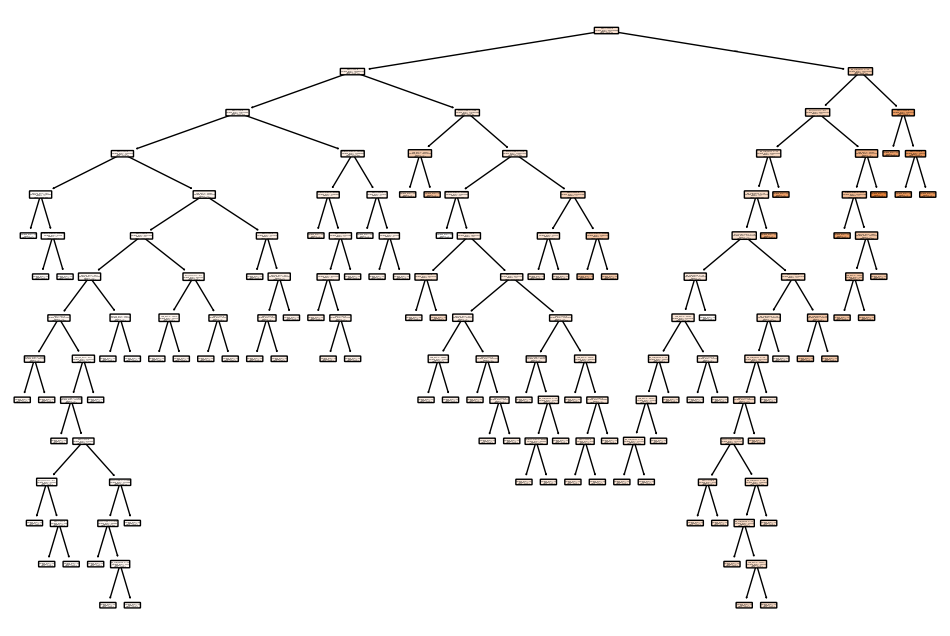

In [71]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Train your model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()


In [122]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [123]:
linmodel = LinearRegression()
linmodel.fit(X_train_scaled, y_train)

# Predict the target variable (price)
y_pred = linmodel.predict(X_test_scaled)

In [124]:
r2_score(y_test, y_pred)

0.503553980198054

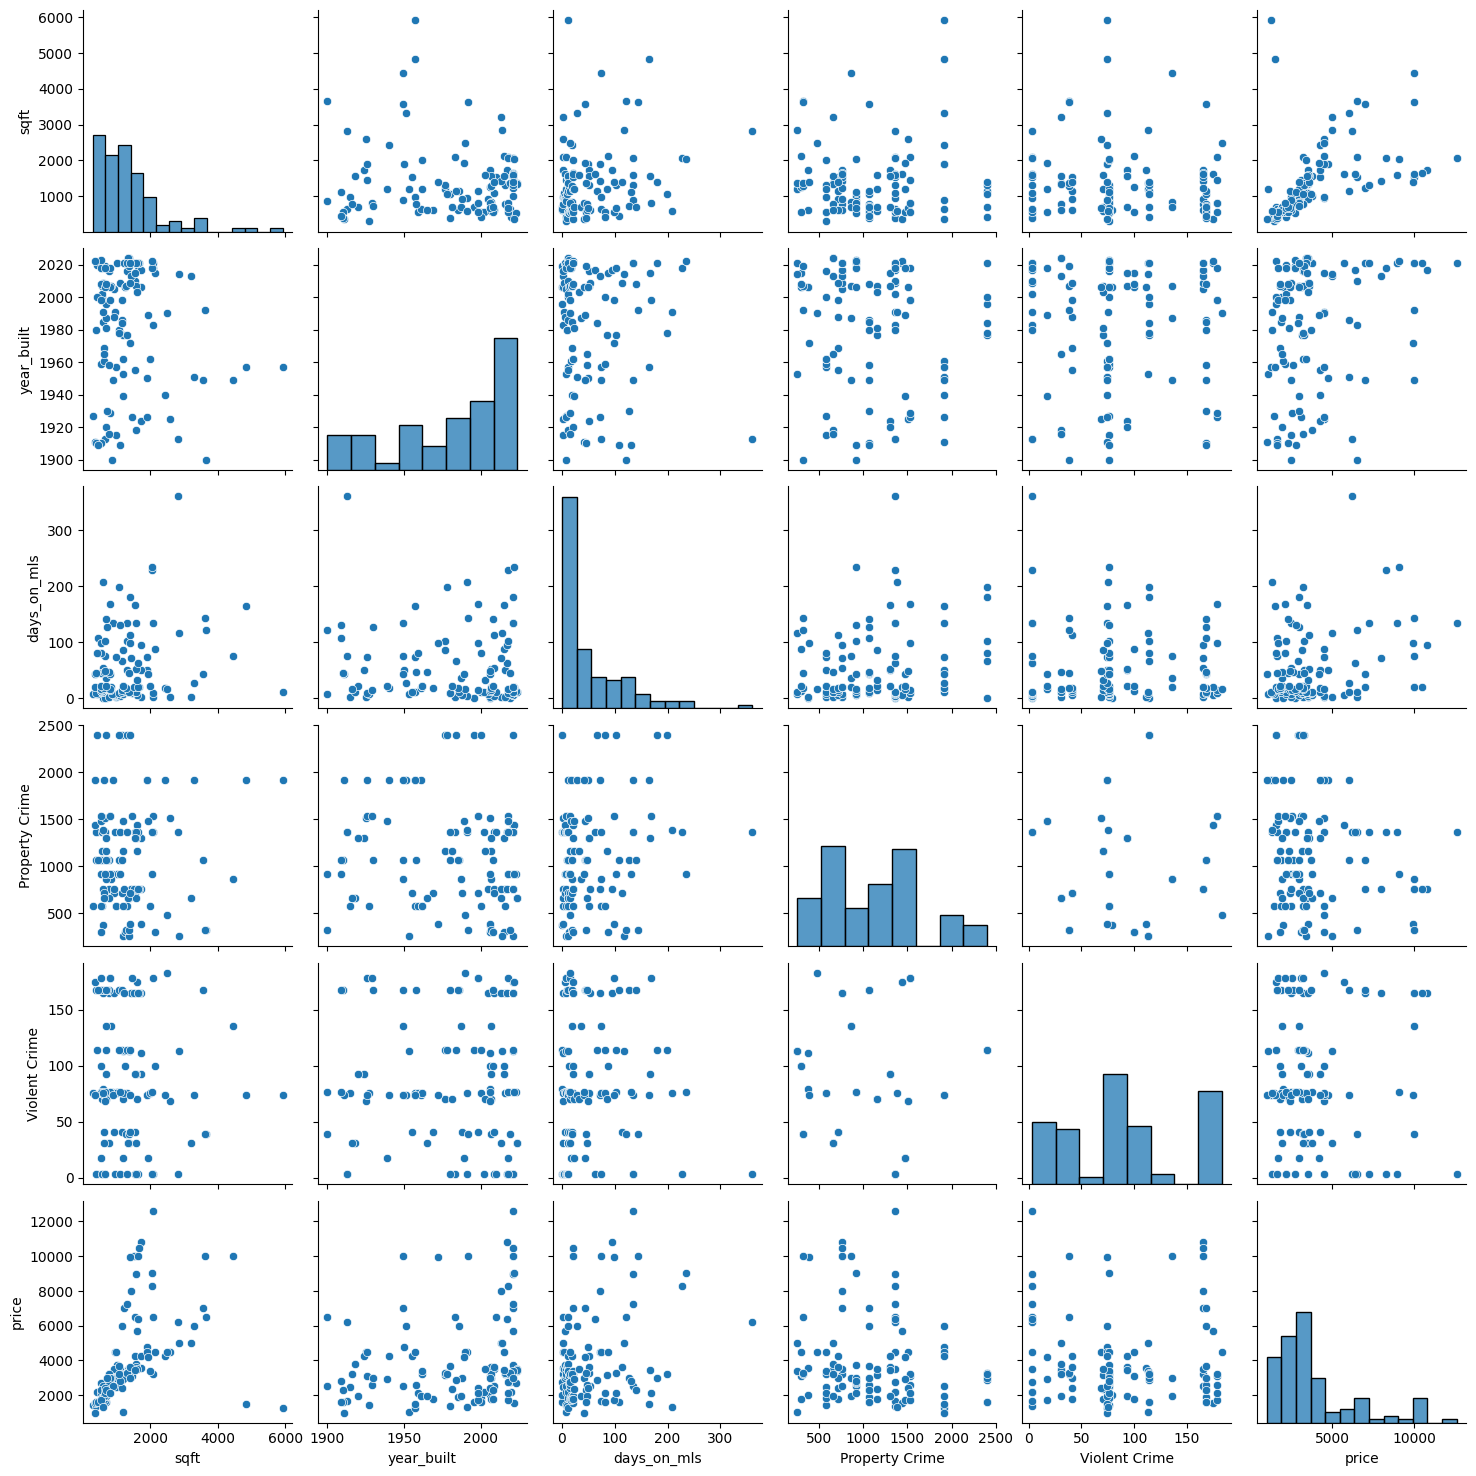

ValueError: could not convert string to float: 'CONDOS'

In [75]:
sns.pairplot(df)
plt.show()

# Visualize correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

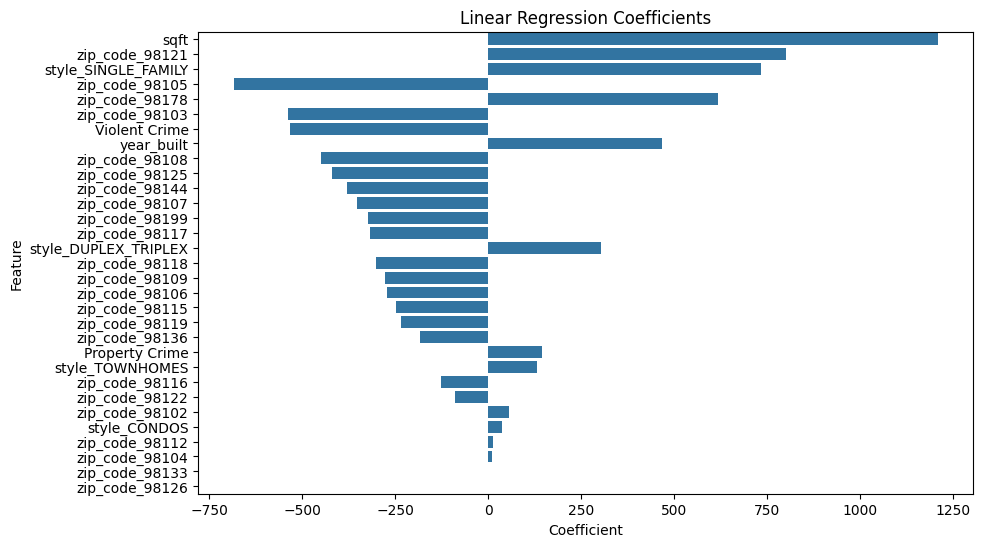

In [125]:
# Get feature names
feature_names = X.columns

# Get the model coefficients
coefficients = linmodel.coef_

# Create a DataFrame to display the features and their coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value to highlight most influential features
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Linear Regression Coefficients')
plt.show()


zip_code
98101    15
98102    10
98105     9
98121     9
98144     8
98104     8
98103     7
98119     6
98115     5
98199     5
98117     4
98118     4
98107     4
98125     3
98108     3
98106     3
98112     3
98122     2
98109     2
98126     1
98116     1
98136     1
98178     1
98133     1
Name: count, dtype: int64

In [82]:
population = pd.read_csv("./zipPopulation.csv", header=None)
population

,0,1
0,98115,46518
1,98103,45596
2,98133,44135
3,98118,43607
4,98125,38584
5,98105,35285
6,98168,34234
7,98198,33304
8,98155,33038
9,98117,31444


In [83]:
properties["zip_code"]

0       98109
1       98112
2       98109
3       98119
4       98119
        ...  
1722    98122
1723    98107
1724    98102
1725    98122
1726    98122
Name: zip_code, Length: 1727, dtype: int64

In [87]:
properties = pd.merge(properties, population, left_on='zip_code', right_on=0, how='left')
properties.drop(0, axis=1, inplace=True)
properties.rename(columns={1: 'population'},inplace=True)
properties

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,...,Violent Crime,metro_lat,metro_long,park_lat,park_long,parking_lat,parking_long,parking_cost,price,population
0,https://www.realtor.com/rentals/details/1000-Q...,9388507782,2977613306,ZILL,3tbhj3u37w4g5,FOR_RENT,NaN,APARTMENT,1000 Queen Anne Ave N,1000 Queen Anne Ave,...,68.666667,47.61139,-122.33722,47.629656,-122.355466,47.625777,47.625777,10.00,1370.0,21398
1,https://www.realtor.com/rentals/details/1800-4...,2045697942,2977600988,RENU,r3813091,FOR_RENT,"For interested prospects, please provide a mob...",TOWNHOMES,1800 43rd Ave E Apt 301,1800 43rd Ave,...,135.500000,47.64972,-122.30380,47.635779,-122.276602,47.623296,47.623296,7.00,2750.0,20898
2,https://www.realtor.com/rentals/details/2111-W...,2796743275,2977598979,ZUMU,60419377,FOR_RENT,"For interested prospects, please provide a mob...",CONDOS,2111 Waverly Pl N Apt 201,2111 Waverly Pl,...,68.666667,47.61139,-122.33722,47.640523,-122.344468,47.638869,47.638869,1.17,2800.0,21398
3,https://www.realtor.com/rentals/details/626-4t...,1189690439,2977587231,SEWA,2326148,FOR_RENT,Special Temporary reduced Rent for 12 months! ...,CONDOS,626 4th Ave W Apt 201,626 4th Ave,...,114.000000,47.61139,-122.33722,47.626809,-122.364152,47.625174,47.625174,18.72,1595.0,20320
4,https://www.realtor.com/rentals/details/3227-1...,9156930040,2977591809,RLXB,ce741b5a-2101-11ee-abe0-06771900a607,FOR_RENT,NaN,APARTMENT,3227 14th Ave W,3227 14th Ave,...,114.000000,47.61139,-122.33722,47.647239,-122.379191,47.664825,47.664825,6.00,1995.0,20320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,https://www.realtor.com/rentals/details/165-17...,1396043702,2966261121,RLXB,890a70c2-58a1-11ee-80f0-02dcc31ee659,FOR_RENT,NaN,APARTMENT,165 17th Ave,165 17th Ave,...,175.000000,47.59833,-122.32806,47.601407,-122.307257,47.606118,47.606118,0.25,2175.0,31199
1723,https://www.realtor.com/rentals/details/2418-N...,9761418095,2966245973,RLXB,b88b3ea6-69de-11ee-8ab6-12de4bf481cd,FOR_RENT,NaN,APARTMENT,2418 NW 57th St,2418 NW 57th St,...,70.666667,47.70306,-122.32806,47.670549,-122.385487,47.670550,47.670550,1.00,1295.0,21826
1724,https://www.realtor.com/rentals/details/603-12...,2785018075,2966268560,RLXB,5b0c80e0-9466-11e8-ba21-1866dab9098f,FOR_RENT,NaN,APARTMENT,603 12th Ave E,603 12th Ave,...,167.666667,47.61861,-122.32028,47.619809,-122.313094,47.624205,47.624205,4.00,1595.0,22603
1725,https://www.realtor.com/rentals/details/1510-2...,2814816034,2966252971,RLXB,620a7610-99b7-11ec-9463-061468efe32a,FOR_RENT,Available now is a room for rent with a privat...,APARTMENT,1510 23rd Ave,1510 23rd Ave,...,175.000000,47.61861,-122.32028,47.617309,-122.300994,47.608086,47.608086,3.58,875.0,31199


In [88]:
properties["violent_crime_rate"] = properties["Violent Crime"] / properties["population"]
properties["property_crime_rate"] = properties["Property Crime"] / properties["population"]

In [89]:
properties

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,...,metro_long,park_lat,park_long,parking_lat,parking_long,parking_cost,price,population,violent_crime_rate,property_crime_rate
0,https://www.realtor.com/rentals/details/1000-Q...,9388507782,2977613306,ZILL,3tbhj3u37w4g5,FOR_RENT,NaN,APARTMENT,1000 Queen Anne Ave N,1000 Queen Anne Ave,...,-122.33722,47.629656,-122.355466,47.625777,47.625777,10.00,1370.0,21398,0.003209,0.070708
1,https://www.realtor.com/rentals/details/1800-4...,2045697942,2977600988,RENU,r3813091,FOR_RENT,"For interested prospects, please provide a mob...",TOWNHOMES,1800 43rd Ave E Apt 301,1800 43rd Ave,...,-122.30380,47.635779,-122.276602,47.623296,47.623296,7.00,2750.0,20898,0.006484,0.041116
2,https://www.realtor.com/rentals/details/2111-W...,2796743275,2977598979,ZUMU,60419377,FOR_RENT,"For interested prospects, please provide a mob...",CONDOS,2111 Waverly Pl N Apt 201,2111 Waverly Pl,...,-122.33722,47.640523,-122.344468,47.638869,47.638869,1.17,2800.0,21398,0.003209,0.070708
3,https://www.realtor.com/rentals/details/626-4t...,1189690439,2977587231,SEWA,2326148,FOR_RENT,Special Temporary reduced Rent for 12 months! ...,CONDOS,626 4th Ave W Apt 201,626 4th Ave,...,-122.33722,47.626809,-122.364152,47.625174,47.625174,18.72,1595.0,20320,0.005610,0.118159
4,https://www.realtor.com/rentals/details/3227-1...,9156930040,2977591809,RLXB,ce741b5a-2101-11ee-abe0-06771900a607,FOR_RENT,NaN,APARTMENT,3227 14th Ave W,3227 14th Ave,...,-122.33722,47.647239,-122.379191,47.664825,47.664825,6.00,1995.0,20320,0.005610,0.118159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,https://www.realtor.com/rentals/details/165-17...,1396043702,2966261121,RLXB,890a70c2-58a1-11ee-80f0-02dcc31ee659,FOR_RENT,NaN,APARTMENT,165 17th Ave,165 17th Ave,...,-122.32806,47.601407,-122.307257,47.606118,47.606118,0.25,2175.0,31199,0.005609,0.046003
1723,https://www.realtor.com/rentals/details/2418-N...,9761418095,2966245973,RLXB,b88b3ea6-69de-11ee-8ab6-12de4bf481cd,FOR_RENT,NaN,APARTMENT,2418 NW 57th St,2418 NW 57th St,...,-122.32806,47.670549,-122.385487,47.670550,47.670550,1.00,1295.0,21826,0.003238,0.053255
1724,https://www.realtor.com/rentals/details/603-12...,2785018075,2966268560,RLXB,5b0c80e0-9466-11e8-ba21-1866dab9098f,FOR_RENT,NaN,APARTMENT,603 12th Ave E,603 12th Ave,...,-122.32028,47.619809,-122.313094,47.624205,47.624205,4.00,1595.0,22603,0.007418,0.047368
1725,https://www.realtor.com/rentals/details/1510-2...,2814816034,2966252971,RLXB,620a7610-99b7-11ec-9463-061468efe32a,FOR_RENT,Available now is a room for rent with a privat...,APARTMENT,1510 23rd Ave,1510 23rd Ave,...,-122.32028,47.617309,-122.300994,47.608086,47.608086,3.58,875.0,31199,0.005609,0.046003


In [90]:
properties.to_csv("./FinalDataset2.csv")